# Support Vector Machine

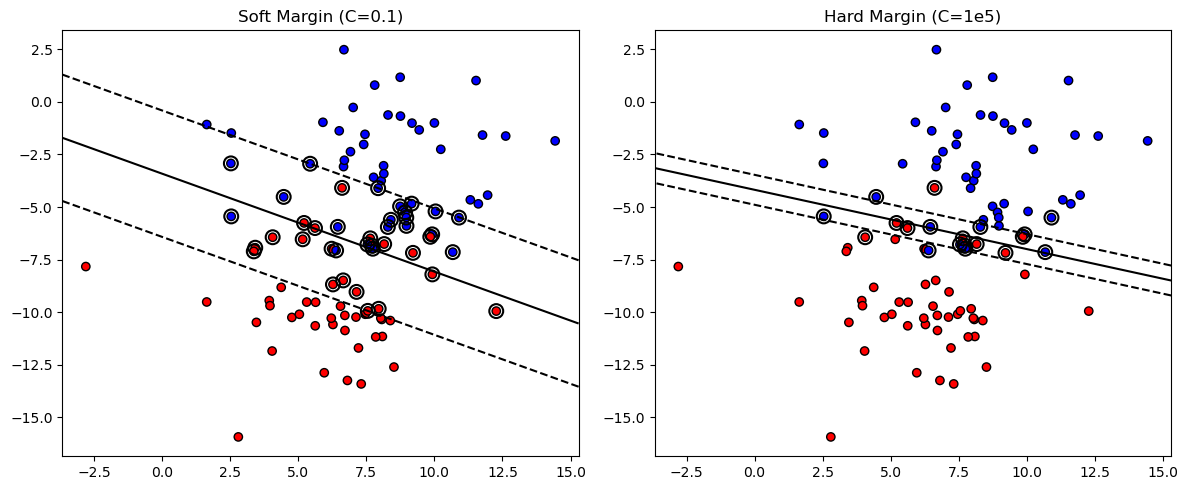

In [76]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np



# Generate simple 2-class dataset with more overlap
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=2.5)

# Soft margin (small C)
soft_model = SVC(kernel='linear', C=0.01)
soft_model.fit(X, y)

# Hard margin (large C)
hard_model = SVC(kernel='linear', C=100000)
hard_model.fit(X, y)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12,5))

for ax, model, title in zip(axes, [soft_model, hard_model], ['Soft Margin (C=0.1)', 'Hard Margin (C=1e5)']):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               facecolors='none', edgecolors='k', linewidths=1.5)
    
    # Plot decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    ax.set_title(title)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.tight_layout()
plt.show()

# Soft margin: Allows some points inside the margin or misclassified.
# Hard margin:Forces strict separation if possible, no tolerance for violations.


In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,X,Y,Class
0,11.971797,-7.504889,3
1,-8.277160,3.589366,2
2,6.159895,-3.174328,3
3,-8.445008,3.845746,2
4,-8.012580,2.902211,2


In [3]:
df.describe()

,X,Y,Class
count,5000.000000,5000.000000,5000.000000
mean,-0.178067,-0.579911,1.500000
std,5.998181,4.412769,1.118146
min,-13.718486,-19.716218,0.000000
25%,-7.127540,-3.457994,0.750000
50%,0.393012,-0.002115,1.500000
75%,4.487479,3.094766,2.250000
max,21.494466,10.981597,3.000000


<Axes: xlabel='X', ylabel='Y'>

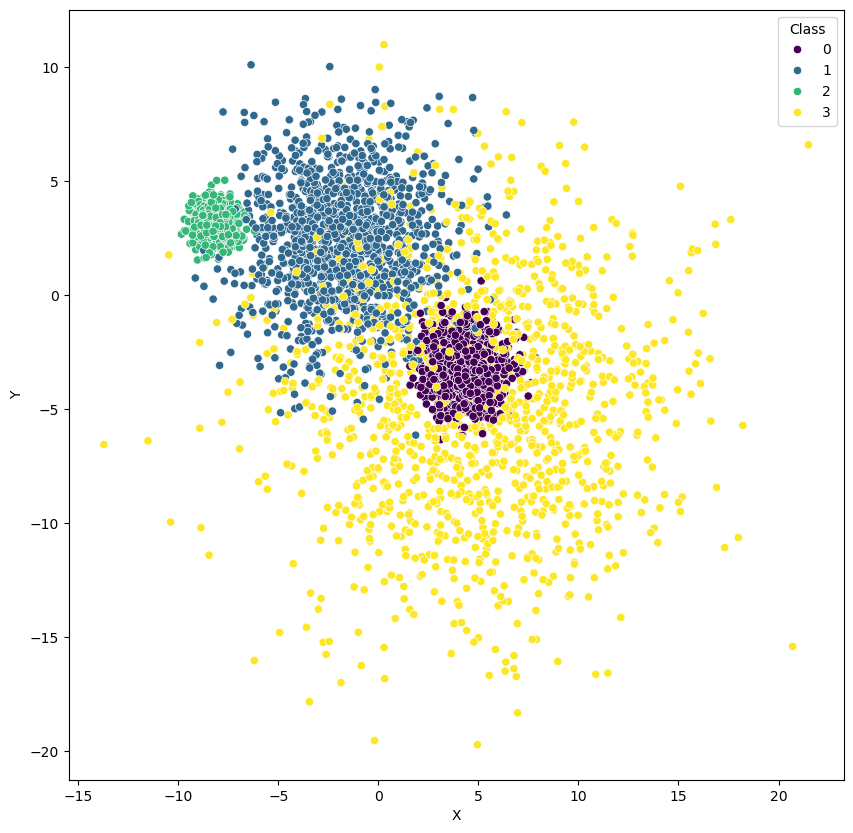

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='X', y='Y', hue='Class', palette='viridis')

In [7]:
import numpy as np

train, test, val = np.split(df.sample(frac=1, random_state=42), [int(.333*len(df)), int(.666*len(df))])
len(train), len(test), len(val)

C:\Users\Jiyan\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(1665, 1665, 1670)

<Axes: xlabel='X', ylabel='Y'>

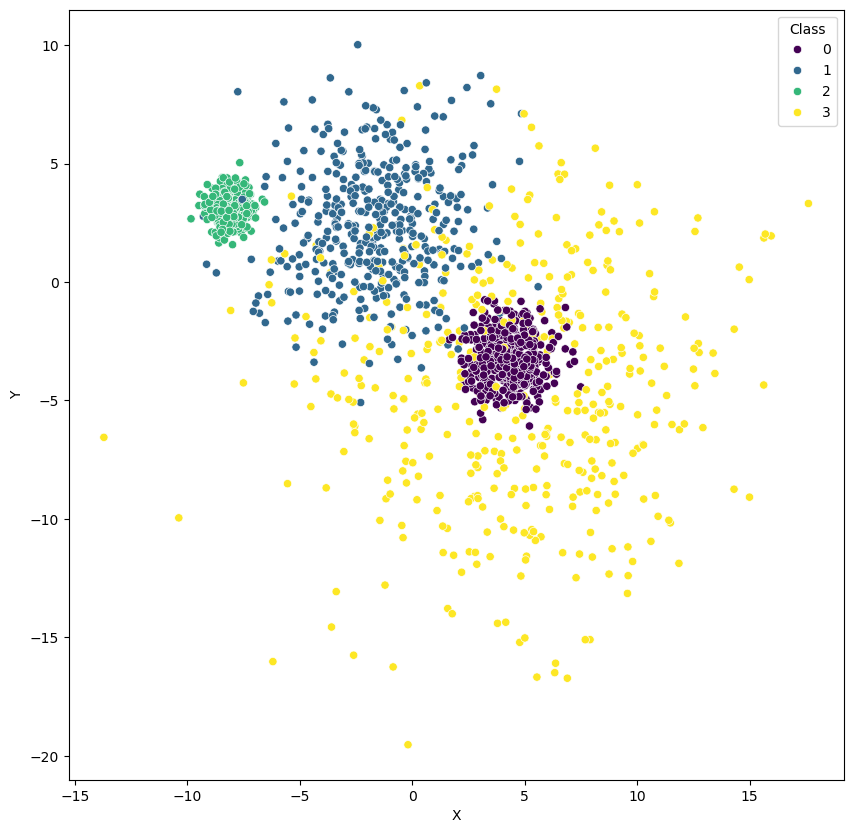

In [9]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=train, x='X', y='Y', hue='Class', palette='viridis')

In [11]:
xTrain = train[['X', 'Y']].values
yTrain = train['Class'].values
xTest = test[['X', 'Y']].values
yTest = test['Class'].values
xVal = val[['X', 'Y']].values
yVal = val['Class'].values

Support Vector Machines (SVM) are powerful supervised learning models used for classification and regression tasks. SVM aims to find the optimal hyperplane that separates different classes by maximizing the margin between them. It uses support vectors (critical data points) to define the decision boundary. SVM can handle linear and non-linear classification using different kernels like linear, polynomial, radial basis function (RBF), and sigmoid. Soft-margin SVM allows some misclassifications to improve generalization on noisy datasets.



In SVM, **C** is the regularization parameter that controls the trade-off between achieving a low error on the training data and maintaining a large margin between classes.
- **Small C**: Allows a wider margin by tolerating some misclassifications (soft margin).
- **Large C**: Penalizes misclassifications heavily, leading to a narrower margin and stricter classification (hard margin).

Thus, C helps balance **model complexity** and **classification accuracy**.

When using a **Linear kernel** in SVM, the following parameters can be tuned:

- **C**: Regularization parameter. Controls the balance between a wide margin and correct classification.
- **loss** (only in linear models like `LinearSVC`): Hinge loss vs squared hinge loss.
- **fit_intercept**: Whether to calculate the intercept term or not.
- **class_weight**: Adjusts weights inversely proportional to class frequencies (useful for imbalanced datasets).

Mathematical form for the linear kernel is simple:
$ K(x, x') = x \cdot x' $

**Typical usage:**
- Tune `C` mainly.
- `class_weight='balanced'` is useful when you have class imbalance.
- `fit_intercept=True` is default and usually preferred.

Linear kernel is computationally efficient and often best when the number of features is large compared to the number of samples.



### Hinge Loss vs Squared Hinge Loss:

- **Hinge Loss** (default in SVM):

$\text{Loss} = \max(0, 1 - y (w \cdot x + b)) $

No penalty if a point is correctly classified with a margin greater than 1. Otherwise, linear penalty increases.
Focuses only on support vectors and points inside the margin.

- **Squared Hinge Loss**:

$ \text{Loss} = \left(\max(0, 1 - y (w \cdot x + b))\right)^2 $

Similar to hinge loss but penalizes margin violations quadratically, making it more sensitive to misclassified points.
Leads to a smoother optimization problem (differentiable), but sometimes slightly slower to converge.

### Quick Comparison:

| Loss Type | Behavior | When to Use |
|:---|:---|:---|
| Hinge Loss | Linear penalty for errors | Default, robust to outliers |
| Squared Hinge Loss | Stronger penalty for larger errors | When you want to heavily punish misclassified points |

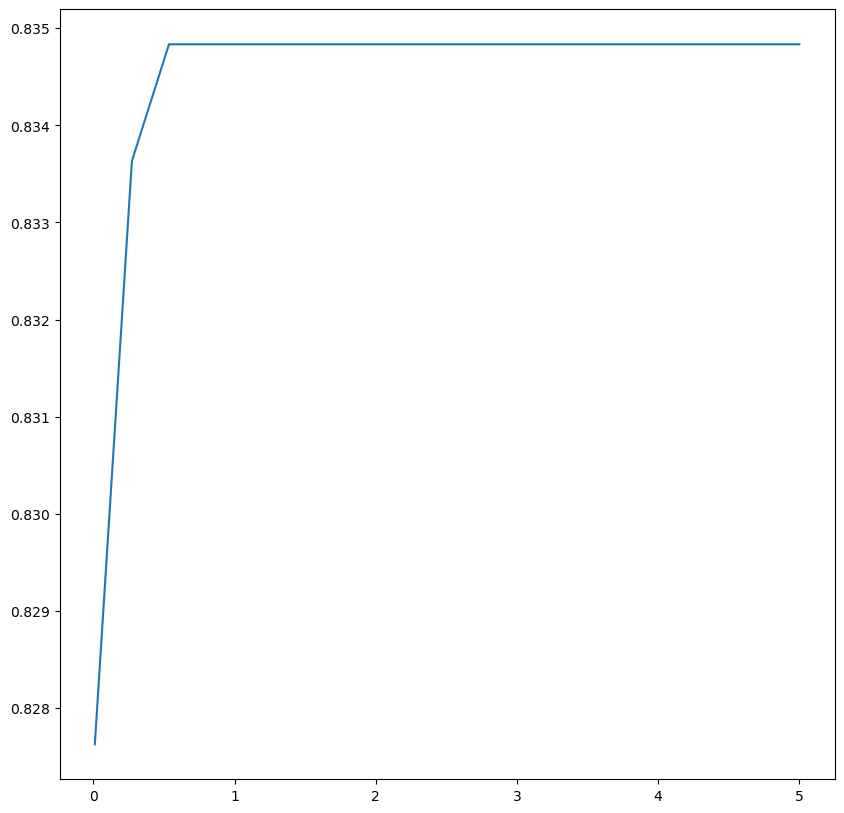

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

accuracies = []
Cs = []

for C in np.linspace(0.01, 5, 20):
    model = SVC(C=C, kernel='linear')
    model.fit(xTrain, yTrain)
    
    test_pred = model.predict(xTest)
    test_acc = accuracy_score(yTest, test_pred)
    
    Cs.append(C)
    accuracies.append(test_acc)
    
plt.figure(figsize=(10,10))
ax = sns.lineplot(x=Cs, y=accuracies)

In [16]:
model2 = SVC(C=Cs[np.argmax(accuracies)], kernel='linear')
model2.fit(xTrain, yTrain)

SVC(C=0.5352631578947369, kernel='linear')

In [16]:
# Print best C value
best_C = Cs[np.argmax(accuracies)]
print(f"Best C value: {best_C:.2f} with accuracy: {max(accuracies)*100:.2f}%")


Best C value: 0.54 with accuracy: 83.48%


In [22]:
def plot_model(model, train):
    plt.figure(figsize=(10,10))
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    ax.scatter(train['X'], train['Y'], c=yTrain, cmap='jet')
    
    X, Y = np.meshgrid(np.linspace(train['X'].min(), train['X'].max(), 1000),
                      np.linspace(train['Y'].min(), train['Y'].max(), 1000))
    
    Z = model.predict(np.c_[X.ravel(), Y.ravel()])
    Z = Z.reshape(X.shape)
    
    ax.contourf(X, Y, Z, cmap='jet', alpha=0.25)

<Figure size 1000x1000 with 0 Axes>

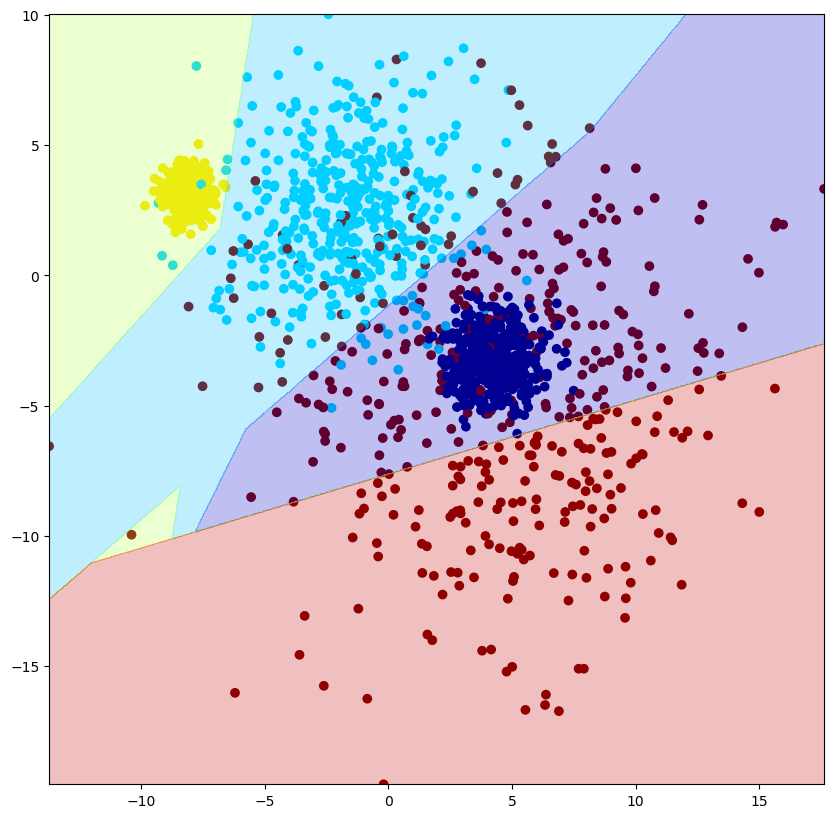

In [24]:
plot_model(model2, train)

<Figure size 1000x1000 with 0 Axes>

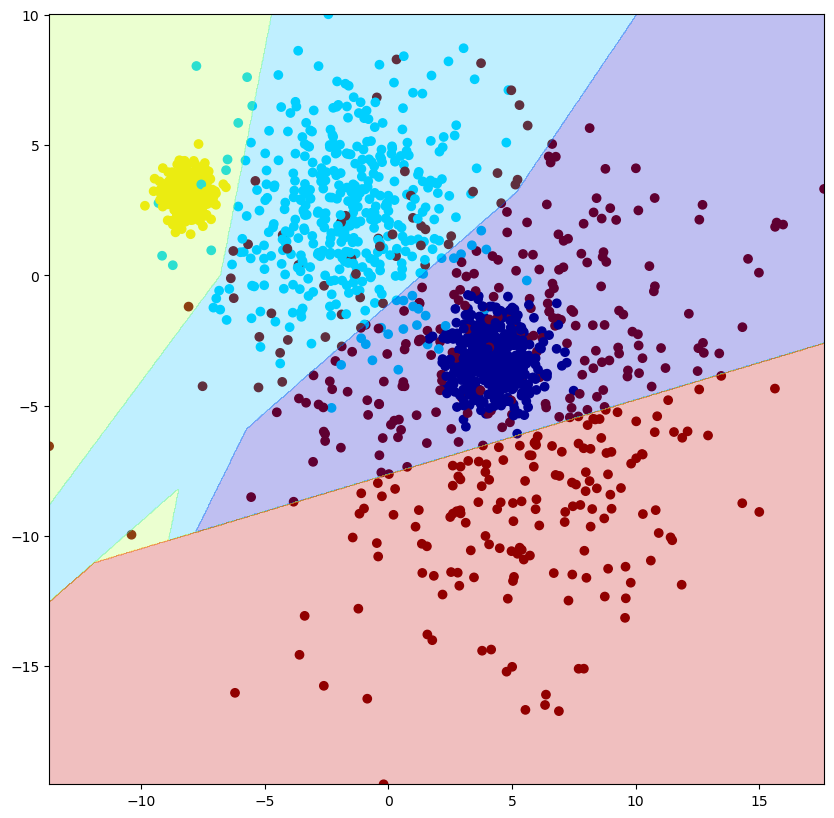

In [26]:
model00 = SVC(C=0.02, kernel='linear')
model00.fit(xTrain, yTrain)

plot_model(model00, train)

<Figure size 1000x1000 with 0 Axes>

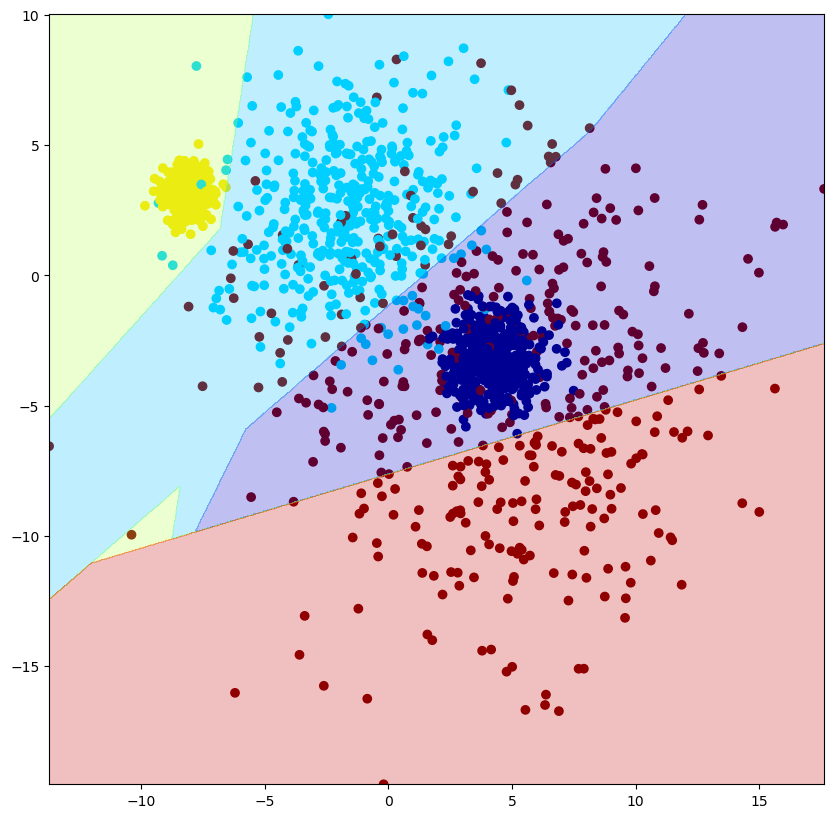

In [28]:
model01 = SVC(C=0.54, kernel='linear')
model01.fit(xTrain, yTrain)

plot_model(model01, train)

In [30]:
accuracies = []
params = []

for C in np.linspace(0.01, 5, 20):
    for degree in range(2, 10):
        model = SVC(C=C, degree=degree, kernel='poly')
        model.fit(xTrain, yTrain)
        
        test_pred = model.predict(xTest)
        test_acc = accuracy_score(yTest, test_pred)
        
        params.append({'C': C, 'degree': degree})
        accuracies.append(test_acc)

# Find the best index
best_idx = np.argmax(accuracies)
best_params = params[best_idx]

# Refit model
model3 = SVC(C=best_params['C'], degree=best_params['degree'], kernel='poly')
model3.fit(xTrain, yTrain)

# Predict and final accuracy
test_pred_final = model3.predict(xTest)
final_accuracy = accuracy_score(yTest, test_pred_final)

# Print
print(f"Best parameters: C = {best_params['C']:.2f}, degree = {best_params['degree']}")
print(f"Final Test Accuracy: {final_accuracy * 100:.2f}%")


Best parameters: C = 3.69, degree = 3
Final Test Accuracy: 89.19%


### Polynomial Kernel Parameters:

When using a **Polynomial kernel** in SVM, the following parameters can be tuned:

- **C**: Regularization parameter. Controls the trade-off between achieving a low training error and a large margin.
- **degree**: Degree of the polynomial kernel function. Higher degrees create more complex decision boundaries.
- **gamma**: Scale factor for the dot product. Controls the influence of each training example.
- **coef0**: Independent term added in the polynomial kernel. Shifts the decision boundary.

Mathematically, the polynomial kernel is:
$K(x, x') = (\gamma \, x \cdot x' + \text{coef0})^{\text{degree}}$

**Typical settings:**
- `degree` = 2 or 3.
- `gamma` = `'scale'`, `'auto'`, or small positive value.
- `coef0` = 0 or small positive value.

The choice of these parameters impacts model flexibility and ability to capture complex patterns.


<Figure size 1000x1000 with 0 Axes>

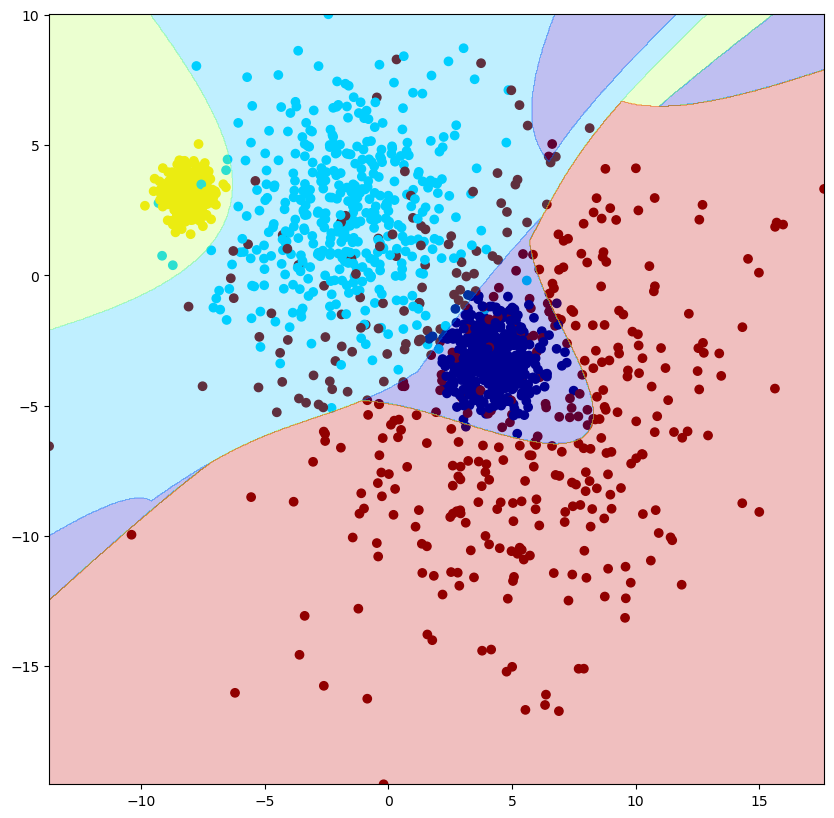

In [131]:
plot_model(model3, train)

In [32]:
accuracies=[]
params=[]

for c in np.linspace(0.01, 5, 20):
    for g in np.linspace(0.001, 2, 40):
        model = SVC(C=c, gamma=g, kernel='rbf') #Radial (radius) basis function
        model.fit(xTrain, yTrain)
    
        test_pred = model.predict(xTest)
        test_acc = accuracy_score(yTest, test_pred)
    
        params.append({'c':c, 'g':g})
        accuracies.append(test_acc)
        
model4 = SVC(C=params[np.argmax(accuracies)]['c'], gamma=params[np.argmax(accuracies)]['g'], kernel='rbf')
model4.fit(xTrain, yTrain)

SVC(C=0.7978947368421053, gamma=0.05225641025641026)

In [34]:
best_idx = np.argmax(accuracies)
best_params = params[best_idx]

print(f"Best parameters: C = {best_params['c']:.2f}")
print(f"Final Test Accuracy: {accuracies[best_idx] * 100:.2f}%")


Best parameters: C = 0.80
Final Test Accuracy: 92.79%


### RBF Kernel Parameters:

When using a **Radial Basis Function (RBF) kernel**, the following parameters can be tuned:

- **C**: Regularization parameter. Controls the trade-off between a smooth decision boundary and correctly classifying training points.
- **gamma**: Defines how far the influence of a single training example reaches.

Mathematically, the RBF kernel is:
$ K(x, x') = \exp\left(-\gamma \|x - x'\|^2\right) $

**Parameter effects:**
- **Small gamma**: Wider influence, smoother decision boundaries (underfitting risk).
- **Large gamma**: Narrow influence, tighter fitting around training data (overfitting risk).
- **Small C**: Wider margin, more tolerance for misclassified points.
- **Large C**: Narrow margin, harder penalization of misclassifications.

**Typical settings:**
- `gamma` = `'scale'`, `'auto'`, or tuned manually.
- `C` = Start around 0.01 and tune with cross-validation.

Tuning both **C** and **gamma** carefully is crucial for achieving high model performance with RBF kernel.

<Figure size 1000x1000 with 0 Axes>

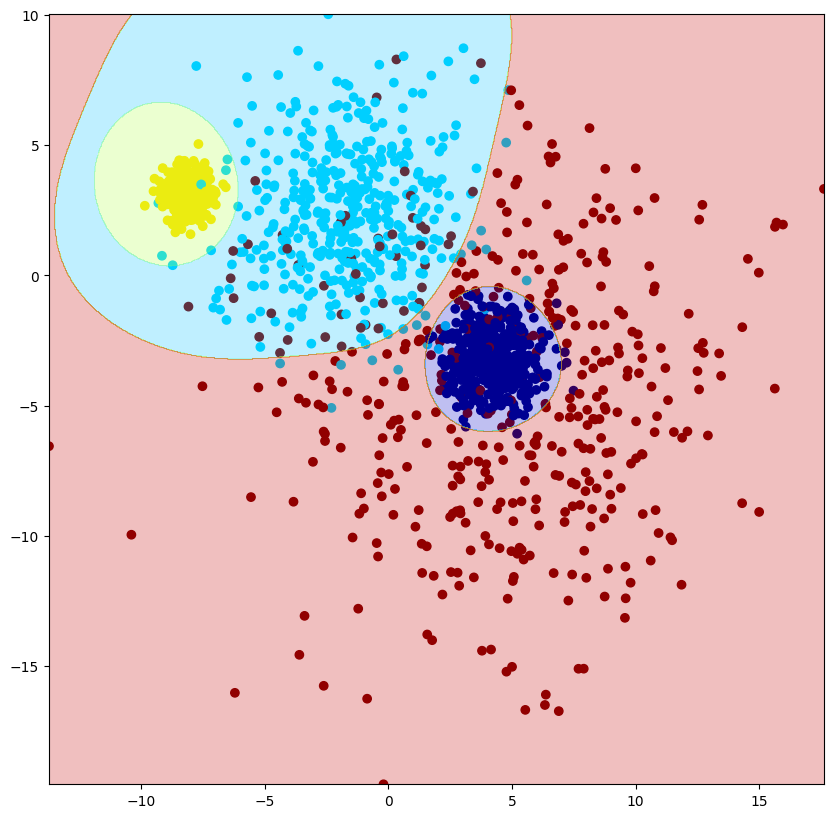

In [23]:
plot_model(model4, train)

In [36]:
accuracies=[]
params=[]

for c in np.linspace(0.01, 5, 20):
    for g in np.linspace(0.001, 2, 40):
        model = SVC(C=c, gamma=g, kernel='sigmoid') #Radial (radius) basis function
        model.fit(xTrain, yTrain)
    
        test_pred = model.predict(xTest)
        test_acc = accuracy_score(yTest, test_pred)
    
        params.append({'c':c, 'g':g})
        accuracies.append(test_acc)
        
model5 = SVC(C=params[np.argmax(accuracies)]['c'], gamma=params[np.argmax(accuracies)]['g'], kernel='rbf')
model5.fit(xTrain, yTrain)

SVC(C=4.474736842105263, gamma=0.001)

In [32]:
model2_pred = model2.predict(xVal)
model2_acc = accuracy_score(yVal, model2_pred)

model3_pred = model3.predict(xVal)
model3_acc = accuracy_score(yVal, model3_pred)

model4_pred = model4.predict(xVal)
model4_acc = accuracy_score(yVal, model4_pred)

model5_pred = model5.predict(xVal)
model5_acc = accuracy_score(yVal, model5_pred)
print("linear",model2_acc)
print("Ploy",model3_acc)
print("RBF",model4_acc)
print("SIgmoid",model5_acc)

linear 0.8167664670658683
Ploy 0.8880239520958084
RBF 0.9149700598802395
SIgmoid 0.8622754491017964


### Particle swarm optimization


<img src="pso.gif" >


### Particle Swarm Optimization (PSO):

**What is PSO?**

- Particle Swarm Optimization (PSO) is a population-based optimization algorithm inspired by the social behavior of birds flocking or fish schooling.
- Each "particle" represents a candidate solution and moves through the solution space by following its own best-known position and the best-known positions found by other particles.

**How PSO Works:**
- Each particle has a position and a velocity.
- Particles adjust their velocity and position based on their own best experience and the best experience of their neighbors.
- Iteratively, particles converge towards the best solution.

**Mathematically:**
$ v_{i}(t+1) = w v_{i}(t) + c_1 r_1 (pbest_{i} - x_{i}(t)) + c_2 r_2 (gbest - x_{i}(t)) $
$x_{i}(t+1) = x_{i}(t) + v_{i}(t+1) $
where:
- \( w \) = inertia weight (momentum)
- \( c_1, c_2 \) = cognitive and social coefficients
- \( r_1, r_2 \) = random numbers in [0,1]

**Using PSO for SVM:**
- PSO can be used to optimize SVM hyperparameters such as **C**, **gamma**, **degree** (for polynomial kernels).
- Instead of manually trying different parameters or using grid search, PSO automatically finds the best parameters that maximize model accuracy.

**Typical PSO + SVM Workflow:**
1. Define a fitness function (e.g., cross-validation accuracy).
2. Use PSO to search for the best (C, gamma) pair.
3. Train SVM with the best-found parameters.


In [46]:
#import optuna

/singularity/00-gupyt3r/.ve-jhub/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
import optunity

print(optunity.__version__)

1.0.0


In [38]:
import optunity.cross_validation
import optunity.metrics

import time
start = time.time()

#@optunity.cross_validated(x=xTrain, y=yTrain, num_folds=10, num_iter=1,
                         #strata=optunity.cross_validation.strata_by_labels(yTrain))
@optunity.cross_validated(x=xTrain, y=yTrain, num_folds=10, num_iter=1)
def PSO(x_train, y_train, x_test, y_test, c, g):
    model = SVC(C=c, gamma=g, kernel='rbf')
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    return optunity.metrics.accuracy(y_test, predictions)


solver = optunity.solvers.ParticleSwarm(num_particles=100, num_generations=1, c=[0.01, 5], g=[0.001, 2])
hpars, info = optunity.optimize(solver, PSO)

print(time.time()-start)

84.83311676979065


In [36]:
Model = SVC(C=hpars['c'], gamma=hpars['g'], kernel='rbf', probability=True)
Model.fit(xTrain, yTrain)
predictions=Model.predict(xTest)
accuracy_score(yTest, predictions)

0.9261261261261261

In [42]:
from sklearn import metrics
from sklearn import model_selection

probabilities = Model.predict_proba(xTest)

print("Accuracy:", metrics.balanced_accuracy_score(yTest, predictions))
print("F1:", metrics.f1_score(yTest, predictions, average='weighted'))
print("Loss:", metrics.log_loss(yTest, probabilities))

# Set 10-fold cross-validation
print("Cross validation:", model_selection.cross_val_score(Model, df[['X', 'Y']], df['Class'], cv=10))

print(metrics.classification_report(yTest, predictions))


Accuracy: 0.9247019936797101
F1: 0.9249104846020354
Loss: 0.2311545408127227
Cross validation: [0.92  0.92  0.922 0.896 0.942 0.92  0.918 0.926 0.934 0.922]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       385
           1       0.91      0.93      0.92       424
           2       0.99      1.00      0.99       450
           3       0.90      0.80      0.85       406

    accuracy                           0.93      1665
   macro avg       0.92      0.92      0.92      1665
weighted avg       0.93      0.93      0.92      1665



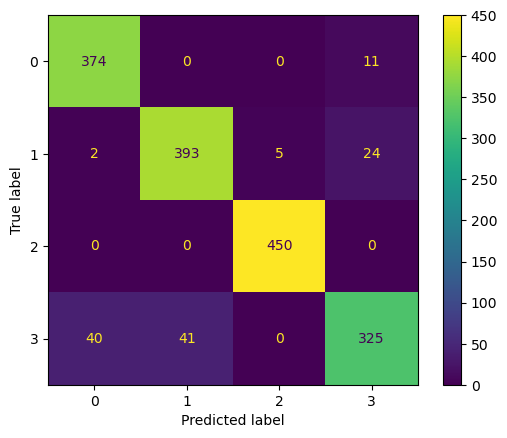

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(Model, xTest, yTest)
plt.show()


One-Class SVM is a variation of SVM used for **anomaly detection**. It tries to learn the properties of "normal" data and identify new data points that are different.

- Suitable for **unsupervised outlier detection**.
- Only requires "normal" data for training.

**Mathematical Idea:**
It finds a decision boundary that encompasses most of the data points.

---

**Parameters we can tune:**
- **nu**: An upper bound on the fraction of training errors (outliers) and a lower bound of the fraction of support vectors. (Typical values between 0.01 and 0.1)
- **kernel**: Type of kernel to use (linear, poly, rbf, sigmoid).
- **gamma**: Kernel coefficient (for rbf, poly, sigmoid kernels).


Training Accuracy (Normal points detected correctly): 95.17%
Cross-Validation Accuracy (mean over 5 folds): 94.17%


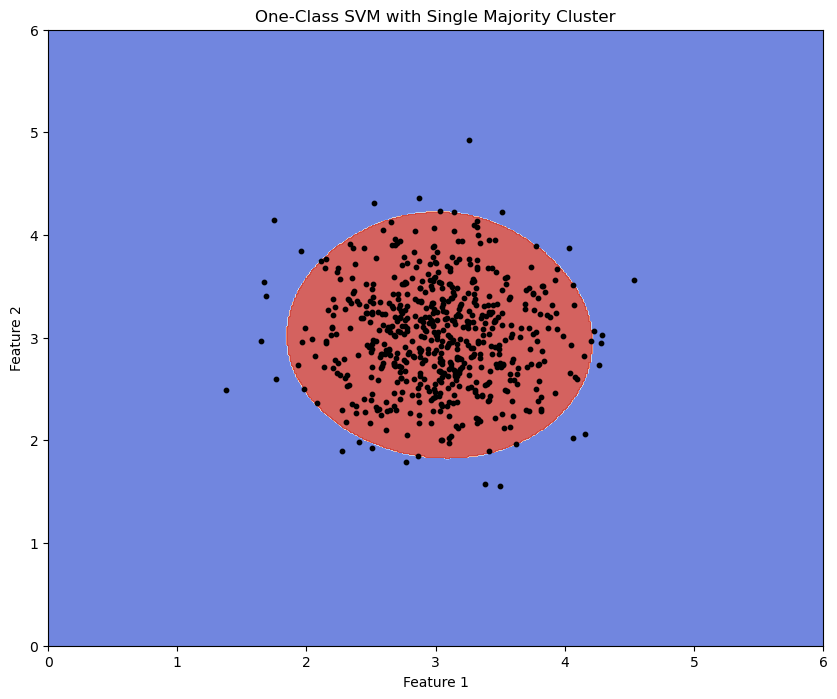

In [99]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create ONE tight cluster (majority class)
X, _ = make_blobs(n_samples=600, centers=[(3, 3)], cluster_std=0.5, random_state=42)

# Fit One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma=0.5, nu=0.05)
ocsvm.fit(X)

# Predict on training data
predictions = ocsvm.predict(X)
accuracy = np.mean(predictions == 1) * 100
print(f"Training Accuracy (Normal points detected correctly): {accuracy:.2f}%")

# Cross-validation (custom scoring)
def one_class_scorer(estimator, X):
    preds = estimator.predict(X)
    return np.mean(preds == 1)

scores = cross_val_score(ocsvm, X, cv=5, scoring=one_class_scorer)
print(f"Cross-Validation Accuracy (mean over 5 folds): {scores.mean() * 100:.2f}%")

# Create a grid for visualization
xx, yy = np.meshgrid(np.linspace(0, 6, 500), np.linspace(0, 6, 500))
Z = ocsvm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c='black', s=10)

plt.title("One-Class SVM with Single Majority Cluster")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Overall Accuracy: 94.44%

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.45      0.80      0.58        30
         1.0       0.99      0.95      0.97       600

    accuracy                           0.94       630
   macro avg       0.72      0.88      0.77       630
weighted avg       0.96      0.94      0.95       630

Confusion Matrix:
[[ 24   6]
 [ 29 571]]
Cross-Validation Accuracy (on normal data only): 94.17%


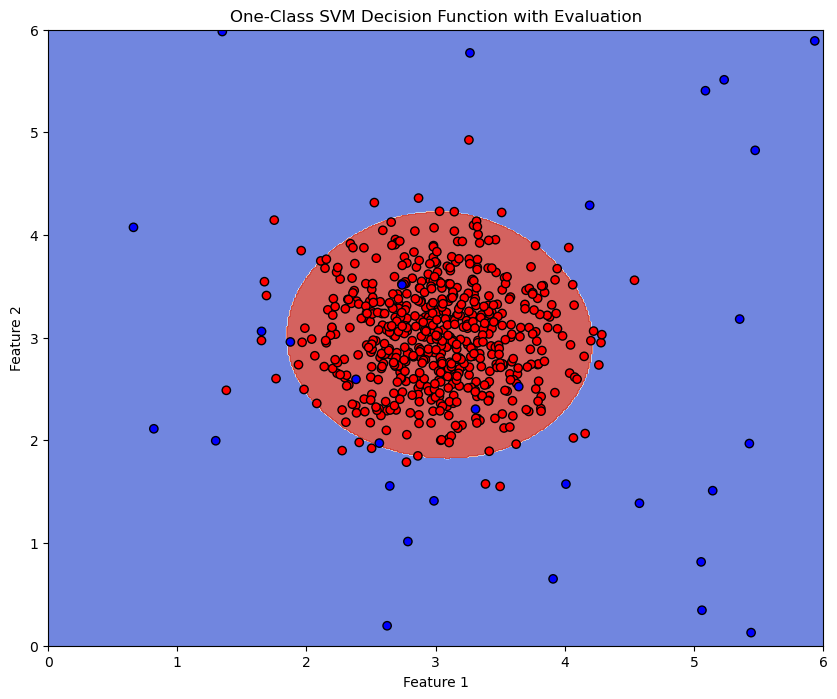

In [44]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Create blobs (single cluster)
X, _ = make_blobs(n_samples=600, centers=[(3, 3)], cluster_std=0.5, random_state=42)

# Create some random outliers
outliers = np.random.uniform(low=0, high=6, size=(30, 2))

# Combine normal points and outliers
X_total = np.vstack([X, outliers])

# True labels: 1 for normal, -1 for outliers
y_true = np.ones(len(X_total))
y_true[-len(outliers):] = -1

# Fit One-Class SVM on normal points only
ocsvm = OneClassSVM(kernel='rbf', gamma=0.5, nu=0.05)
ocsvm.fit(X)

# Predict on total dataset
predictions = ocsvm.predict(X_total)

# Evaluation
accuracy = np.mean(predictions == y_true) * 100
print(f"Overall Accuracy: {accuracy:.2f}%")

print("\nClassification Report:")
print(classification_report(y_true, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_true, predictions))

# Cross-validation (custom scoring)
def one_class_scorer(estimator, X):
    preds = estimator.predict(X)
    return np.mean(preds == 1)

scores = cross_val_score(ocsvm, X, cv=5, scoring=one_class_scorer)
print(f"Cross-Validation Accuracy (on normal data only): {scores.mean() * 100:.2f}%")

# Create a grid for visualization
xx, yy = np.meshgrid(np.linspace(0, 6, 500), np.linspace(0, 6, 500))
Z = ocsvm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_total[:, 0], X_total[:, 1], c=y_true, cmap='bwr', edgecolors='k')

plt.title("One-Class SVM Decision Function with Evaluation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [46]:
import optunity
import optunity.metrics

# Define the objective function
@optunity.cross_validated(x=X_total, y=y_true, num_folds=5)
def oneclass_svm_accuracy(x_train, y_train, x_test, y_test, gamma, nu):
    model = OneClassSVM(kernel='rbf', gamma=gamma, nu=nu)
    model.fit(x_train[y_train==1])  # train only on normal points
    preds = model.predict(x_test)
    acc = np.mean(preds == y_test)
    return acc

# Define search space
search = {'gamma': [0.001, 1.0], 'nu': [0.01, 0.3]}

# Run PSO
optimal_pars, _, _ = optunity.maximize(oneclass_svm_accuracy, num_evals=50, **search)

print("Best parameters found by PSO:")
print(optimal_pars)

# Train final model with best params
ocsvm_best = OneClassSVM(kernel='rbf', gamma=optimal_pars['gamma'], nu=optimal_pars['nu'])
ocsvm_best.fit(X[y_true[:len(X)]==1])  # again, only normal points

# Predict and evaluate
predictions_best = ocsvm_best.predict(X_total)
acc_best = np.mean(predictions_best == y_true) * 100

print(f"\nFinal Accuracy with PSO-optimized parameters: {acc_best:.2f}%")

print("\nClassification Report:")
print(classification_report(y_true, predictions_best))

print("Confusion Matrix:")
print(confusion_matrix(y_true, predictions_best))


Best parameters found by PSO:
{'gamma': 0.35683034383548723, 'nu': 0.013557031250000032}

Final Accuracy with PSO-optimized parameters: 97.62%

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.74      0.77      0.75        30
         1.0       0.99      0.99      0.99       600

    accuracy                           0.98       630
   macro avg       0.87      0.88      0.87       630
weighted avg       0.98      0.98      0.98       630

Confusion Matrix:
[[ 23   7]
 [  8 592]]
